In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale = 1./255)
validation_data_gen = ImageDataGenerator(rescale = 1./255)

path1 = "/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/train"
path2 = "/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/test"
train_generator = train_data_gen.flow_from_directory(path1, target_size=(48, 48), batch_size= 8, color_mode="grayscale", class_mode='categorical')
validation_generator =validation_data_gen.flow_from_directory(path2, target_size =(48, 48), batch_size = 8, color_mode = 'grayscale', class_mode = 'categorical')

num_people = 5
train_images = 616
val_images = 169

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (48,48,1)))
model.add(tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_people, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4), metrics = ['acc'])
model.summary()

Found 610 images belonging to 5 classes.
Found 163 images belonging to 5 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1

In [6]:
model_info = model.fit(train_generator, steps_per_epoch=train_images//8, epochs = 100, validation_data= validation_generator, validation_steps=val_images//8)

Epoch 1/100
77/77 [==============================] - 17s 211ms/step - loss: 1.5461 - acc: 0.3033 - val_loss: 1.5494 - val_acc: 0.3252
Epoch 2/100
77/77 [==============================] - 16s 205ms/step - loss: 1.5280 - acc: 0.3180 - val_loss: 1.5372 - val_acc: 0.3252
Epoch 3/100
77/77 [==============================] - 16s 206ms/step - loss: 1.5219 - acc: 0.3213 - val_loss: 1.5450 - val_acc: 0.3190
Epoch 4/100
77/77 [==============================] - 16s 204ms/step - loss: 1.4993 - acc: 0.3377 - val_loss: 1.5174 - val_acc: 0.3252
Epoch 5/100
77/77 [==============================] - 16s 208ms/step - loss: 1.4705 - acc: 0.3525 - val_loss: 1.4989 - val_acc: 0.3742
Epoch 6/100
77/77 [==============================] - 16s 214ms/step - loss: 1.4278 - acc: 0.4000 - val_loss: 1.4780 - val_acc: 0.3620
Epoch 7/100
77/77 [==============================] - 15s 200ms/step - loss: 1.3981 - acc: 0.3934 - val_loss: 1.4475 - val_acc: 0.4049
Epoch 8/100
77/77 [==============================] - 16s 204ms

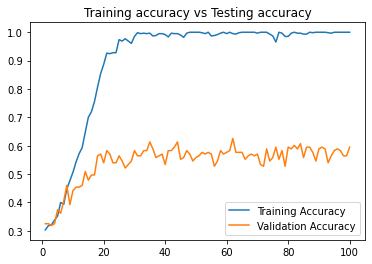

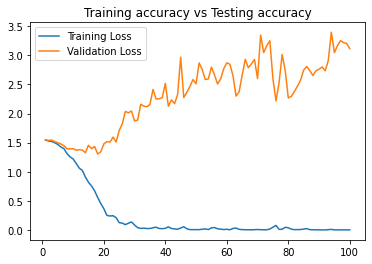

In [8]:
import matplotlib.pyplot as plt

val_acc = model_info.history['val_acc']
val_loss = model_info.history['val_loss']
acc = model_info.history['acc']
loss = model_info.history['loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label ='Validation Accuracy')
plt.title('Training accuracy vs Testing accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label ='Validation Loss')
plt.title('Training accuracy vs Testing accuracy')
plt.legend()
plt.show()


In [21]:
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

heroes = ['Black Widow', 'Captain America', 'Hulk', 'Iron Man', 'Thor']
predimg_path ='/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/test/Captain America/251.jpg'
#predimg_path  = tf.image.rgb_to_grayscale(predimg_path)
img = image.load_img(predimg_path, target_size=(48, 48))
img = tf.image.rgb_to_grayscale(img)
arr_img = image.img_to_array(img)
arr_img = arr_img/255.
arr_img = np.expand_dims(arr_img, axis = 0)
images = np.vstack([arr_img])
classes = model.predict(images, batch_size=10)
print(heroes[np.argmax(classes)])

Captain America


In [ ]:
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

heroes = ['Black Widow', 'Captain America', 'Hulk', 'Iron Man', 'Thor']
predimg_path = '/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/train/Hulk/Hulk 17.jpg'
#predimg_path  = tf.image.rgb_to_grayscale(predimg_path)
img = image.load_img(predimg_path, target_size=(48, 48))
img = tf.image.rgb_to_grayscale(img)
arr_img = image.img_to_array(img)
arr_img = arr_img/255.
arr_img = np.expand_dims(arr_img, axis = 0)
images = np.vstack([arr_img])
classes = model.predict(images, batch_size=10)
print(heroes[np.argmax(classes)])

In [22]:
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

heroes = ['Black Widow', 'Captain America', 'Hulk', 'Iron Man', 'Thor']
predimg_path = '/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/train/Iron Man/Iron_Man5.jpg'
#predimg_path  = tf.image.rgb_to_grayscale(predimg_path)
img = image.load_img(predimg_path, target_size=(48, 48))
img = tf.image.rgb_to_grayscale(img)
arr_img = image.img_to_array(img)
arr_img = arr_img/255.
arr_img = np.expand_dims(arr_img, axis = 0)
images = np.vstack([arr_img])
classes = model.predict(images, batch_size=10)
print(heroes[np.argmax(classes)])

Iron Man


In [27]:
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

heroes = ['Black Widow', 'Captain America', 'Hulk', 'Iron Man', 'Thor']
#predimg_path = '/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/train/Thor/Thor  29.jpg'
predimg_path = '/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/test/Thor/Thor  83.jpg'
#predimg_path  = tf.image.rgb_to_grayscale(predimg_path)
img = image.load_img(predimg_path, target_size=(48, 48))
img = tf.image.rgb_to_grayscale(img)
arr_img = image.img_to_array(img)
arr_img = arr_img/255.
arr_img = np.expand_dims(arr_img, axis = 0)
images = np.vstack([arr_img])
classes = model.predict(images, batch_size=10)
print(heroes[np.argmax(classes)])

Thor


In [26]:
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

heroes = ['Black Widow', 'Captain America', 'Hulk', 'Iron Man', 'Thor']
#predimg_path = '/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/test/Black Widow/Black Widow  94.jpg'
predimg_path = "/Users/surendrasrinivas/Downloads/B.TECH/SEMESTER 5/MISC Sem_05/Avengers/imgs/test/Black Widow/Black Widow  106.jpg"
#predimg_path  = tf.image.rgb_to_grayscale(predimg_path)
img = image.load_img(predimg_path, target_size=(48, 48))
img = tf.image.rgb_to_grayscale(img)
arr_img = image.img_to_array(img)
arr_img = arr_img/255.
arr_img = np.expand_dims(arr_img, axis = 0)
images = np.vstack([arr_img])
classes = model.predict(images, batch_size=10)
print(heroes[np.argmax(classes)])


Black Widow
